In [386]:
import numpy as np
from matplotlib import pyplot as plt

In [387]:
!curl -fsS http://udon.stacken.kth.se/\~ninjin/comp0090_assignment_1_data.tar.gz -o /tmp/data.tar.gz
!tar -x -z -f /tmp/data.tar.gz
!rm -f /tmp/data.tar.gz

In [431]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0))
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0))
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz").transpose((2, 1, 0))
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz")

In [432]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)
print(testxs.shape)
print(testys.shape)

(12000, 28, 28)
(12000,)
(1000, 28, 28)
(1000,)
(1000, 28, 28)
(1000,)


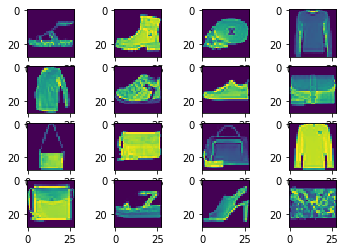

In [433]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(trainxs))])

## 5.1 Implementing "vanilla" perceptron.

In [434]:
# function to create weight and bias parameters for the algorithm
def initialise_parameters(xs):
    w = np.zeros((xs.shape[1], xs.shape[2]))
    b = 0
    return w, b

In [489]:
# function to train baseline model
def train_vanilla_perceptron(xs, ys, devxs, devys):
    w, b = initialise_parameters(xs)
    
    loss = 0
    
    # store validation set loss and consecutive epochs count to detect convergence
    loss_old = validation_loss(devxs, devys, w, b)
    row_epoch = 0
    
    epoch = 0
            
    # train model
    while True:
        permutation = np.random.permutation(xs.shape[0])
        trainxs_shuffled = xs[permutation]
        trainys_shuffled = ys[permutation]
        print('Epoch', epoch)
        for i in range (xs.shape[0]):
            y_hat = predict_vanilla(w, b, trainxs_shuffled[i])
            if y_hat != trainys_shuffled[i]:
                if trainys_shuffled[i] == 1:
                    w += trainxs_shuffled[i]
                    b += 1
                else:
                    w -= trainxs_shuffled[i]
                    b -= 1
                    
        loss = validation_loss(devxs, devys, w, b)
        print('loss', loss)
        print('diff', np.abs(loss - loss_old))
        print('validation set accuracy', accuracy(devxs, devys, w, b))
        if np.abs(loss - loss_old) < 0.005:
            row_epoch += 1
            if row_epoch == 3:
                break
        else:
            row_epoch = 0
        loss_old = loss
        epoch += 1
    return w, b

In [490]:
# function to make predictions
def predict_vanilla(w, b, x):
    if np.matmul(w.flatten(), x.flatten()) + b >= 0:
        return 1
    return 0

In [491]:
# # sigmoid for a single sample
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [492]:
# function to determine validation loss
def accuracy(devxs, devys, w, b):
    accuracy = 0
    for i in range (devxs.shape[0]):
        yp = predict_vanilla(w, b, devxs[i])
        if (yp == devys[i]):
            accuracy += 1
    return accuracy / devys.shape[0]

In [493]:
# function to determine validation loss
def validation_loss(devxs, devys, w, b):
    loss = 0
    for i in range (devxs.shape[0]):
        yprime = predict_vanilla(w, b, devxs[i])
        py = sigmoid(yprime)
        if (py == 0 and devys[i] == 1 or py == 1 and devys[i] == 0):
            py += 1e-15
        elif devys[i] == 1:
            loss += np.log(py)
        else:
            loss += np.log(1 - py)
    return ((-1) / devys.shape[0]) * loss

## 5.2 Train baseline model

Out of the observed values (first 200 epochs), the smallest loss observed for the validation set was in the range 0.54-0.56, so the training is stopped when the loss on the validation set is lower than 0.55.

In [496]:
w_train, b_train = train_vanilla_perceptron(trainxs, trainys, devxs, devys)
dev_accuracy = accuracy(devxs, devys, w_train, b_train)
dev_loss = validation_loss(devxs, devys, w_train, b_train)
print('Vanilla Perceptron final validation accuracy:', dev_accuracy)
print('Vanilla Perceptron final validation loss:', dev_loss)

Epoch 0
loss 0.5181820293929583
diff 0.2900796581252555
validation set accuracy 0.96
Epoch 1
loss 0.5417521060052849
diff 0.023570076612326574
validation set accuracy 0.934
Epoch 2
loss 0.5179475257269555
diff 0.023804580278329435
validation set accuracy 0.972
Epoch 3
loss 0.5169418003790418
diff 0.0010057253479136552
validation set accuracy 0.962
Epoch 4
loss 0.5143440905182074
diff 0.0025977098608344074
validation set accuracy 0.972
Epoch 5
loss 0.537791189949619
diff 0.023447099431411655
validation set accuracy 0.94
Epoch 6
loss 0.5179808843233755
diff 0.01981030562624353
validation set accuracy 0.958
Epoch 7
loss 0.520081456858167
diff 0.002100572534791456
validation set accuracy 0.955
Epoch 8
loss 0.5139251210808319
diff 0.006156335777335098
validation set accuracy 0.975
Epoch 9
loss 0.5141262661504146
diff 0.00020114506958268663
validation set accuracy 0.977
Epoch 10
loss 0.512584319532124
diff 0.0015419466182905461
validation set accuracy 0.976
Epoch 11
loss 0.5122044340390823
d

## 5.3 Outperforming Vanilla Perceptron

Try two layer MLP


In [ ]:
def forward(trainxs):
    z1 = 

## 5.4 Motivation and Final Model

The next logical step in an attempt to increase the model's accuracy is introducing hidden layers to the model. We attempted to create a model with two and three hidden layes and different hyper parameters, and observed how it affects the output loss and accuracy of the model.

## 5.5 Loss plot for best model

In [ ]:
plt.axis([0, epoch, min(min(accuracy_training), min(accuracy_validation)), max(max(accuracy_training), max(accuracy_validation)) + 0.1])
plt.plot(loss_training, label='training set loss')
plt.plot(loss_validation, color='green', label="validation set loss")
plt.legend(loc='lower right')

## 5.6 Accuracy plot for best model

In [ ]:
plt.axis([0, epoch, min(min(accuracy_training), min(accuracy_validation)), max(max(accuracy_training), max(accuracy_validation)) + 0.1])
plt.plot(accuracy_training, label='training set accuracy')
plt.plot(accuracy_validation, color='green', label="tvalidation set accuracy")
plt.legend(loc='lower right')

## 5.7 Accuracy on best epoch

In [ ]:
print("Best epoch =", ind)
print("Accuracy on training set =", accuracy_training[ind])
print("Accuracy on validation set =", accuracy_validation[ind])